In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings

# Filter out the warnings
warnings.filterwarnings('ignore')


In [3]:
# Try reading the CSV file with different encodings
encodings = ['utf-8', 'ISO-8859-1', 'cp1252']

for encoding in encodings:
    try:
        df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding=encoding)
        print(f"Successfully read the file with encoding: {encoding}")
        break  # Break the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")

# Now 'df' should contain  DataFrame


Failed to read with encoding: utf-8
Successfully read the file with encoding: ISO-8859-1


In [4]:
#summary of dataframe
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [5]:
# randomly displaying 5 rows
df.sample(5)  

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1880,ham,Just seeing your missed call my dear brother. ...,NaN,NaN,NaN
1619,ham,Friends that u can stay on fb chat with,NaN,NaN,NaN
2784,ham,"K, wat s tht incident?",NaN,NaN,NaN
3665,ham,I'm turning off my phone. My moms telling ever...,NaN,NaN,NaN
3842,ham,Yes ammae....life takes lot of turns you can o...,NaN,NaN,NaN


In [6]:
#shape of dataframe
df.shape  

(5572, 5)

# **1. Data Cleaning****

In [7]:
#summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
#top 5 rows from dataframe
df.head()  

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#renaming the columns
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)

In [11]:
#top 5 rows from dataframe
df.head()  

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:

# The LabelEncoder is a utility class provided by the scikit-learn library in Python.
# It is primarily used for encoding categorical features into numeric values.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
# Encode the 'target' column using the LabelEncoder object 'encoder'
# and replace the original categorical values with their corresponding numerical representations
df['target'] = encoder.fit_transform(df['target'])

In [14]:
# top 5 rows from dataframe
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

403

In [17]:
#remove duplicated values
df = df.drop_duplicates(keep='first')

In [18]:
# get the total count of duplicated rows
df.duplicated().sum()

0

In [19]:
# summary of dataframe
df.shape


(5169, 2)

# 2. EDA

In [20]:
# Count the occurrences of each unique value in the 'target' column
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

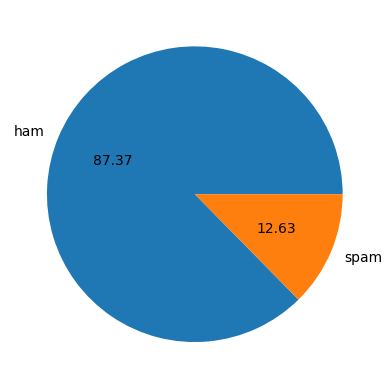

In [21]:
# using matplotlib library for data visualization 
import matplotlib.pyplot as plt

# Create a pie chart to visualize the distribution of values in the 'target' column
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [22]:
# Data Imbalanceed

In [23]:
!pip install nltk

In [24]:
# Import the Natural Language Toolkit (NLTK) library
import nltk

# Set the NLTK data server URL
nltk.data.path.append("/path/to/nltk_data")  # Set the path to your local NLTK data directory
nltk.download('punkt', download_dir="/path/to/nltk_data")


[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [25]:
# Calculate the number of characters in each text entry
# and create a new column 'num_character' in the DataFrame 'df' to store the results
df['num_character'] = df['text'].apply(len)

In [26]:
# top 5 rows from dataframe
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
#number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [28]:
# top 5 rows from dataframe
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
# Calculate the number of sentences in each text entry
# by applying the nltk.sent_tokenize() function to tokenize each text entry into sentences
# and creating a new column 'num_of_sentences' in the DataFrame 'df' to store the counts
df['num_of_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [30]:
# top 5 rows from a dataframe
df.head()

,target,text,num_character,num_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
# Generate descriptive statistics for the numerical columns from dataframe
df[['num_character','num_words','num_of_sentences']].describe()

,num_character,num_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [32]:
#ham messages
df[df['target']==0][['num_character','num_words','num_of_sentences']].describe()

,num_character,num_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [33]:
#spam messages
df[df['target']==1][['num_character','num_words','num_of_sentences']].describe()

,num_character,num_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [34]:
# use seaborn for data visualization
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

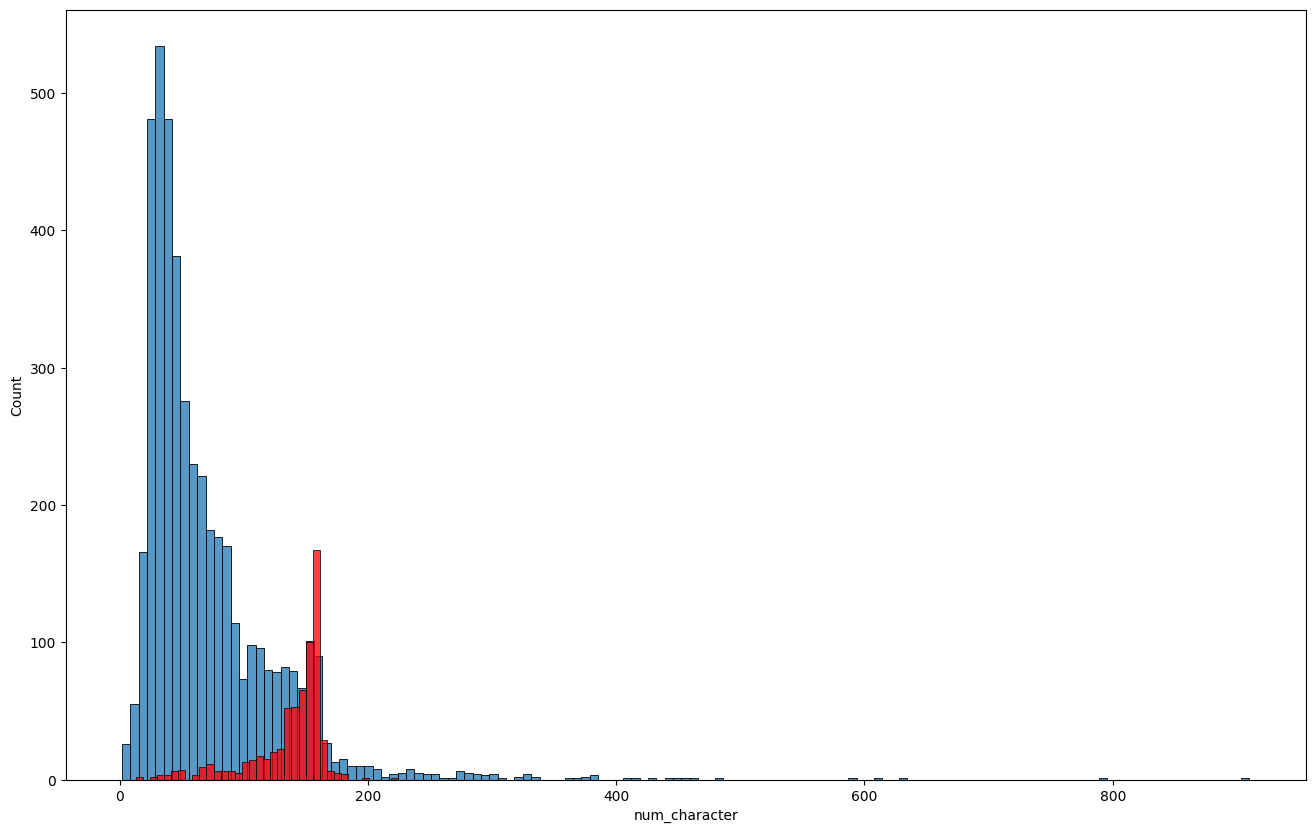

In [35]:
# Create a figure with a specified size (16x10 inches) to display the histograms
plt.figure(figsize=(16,10))

# Plot a histogram of the 'num_character' column for entries where 'target' is 0 (assuming 0 represents one class)
sns.histplot(df[df['target']==0]['num_character'])

# Plot a histogram of the 'num_character' column for entries where 'target' is 1 (assuming 1 represents another class),
# with a different color (red) to distinguish it from the first class
sns.histplot(df[df['target']==1]['num_character'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

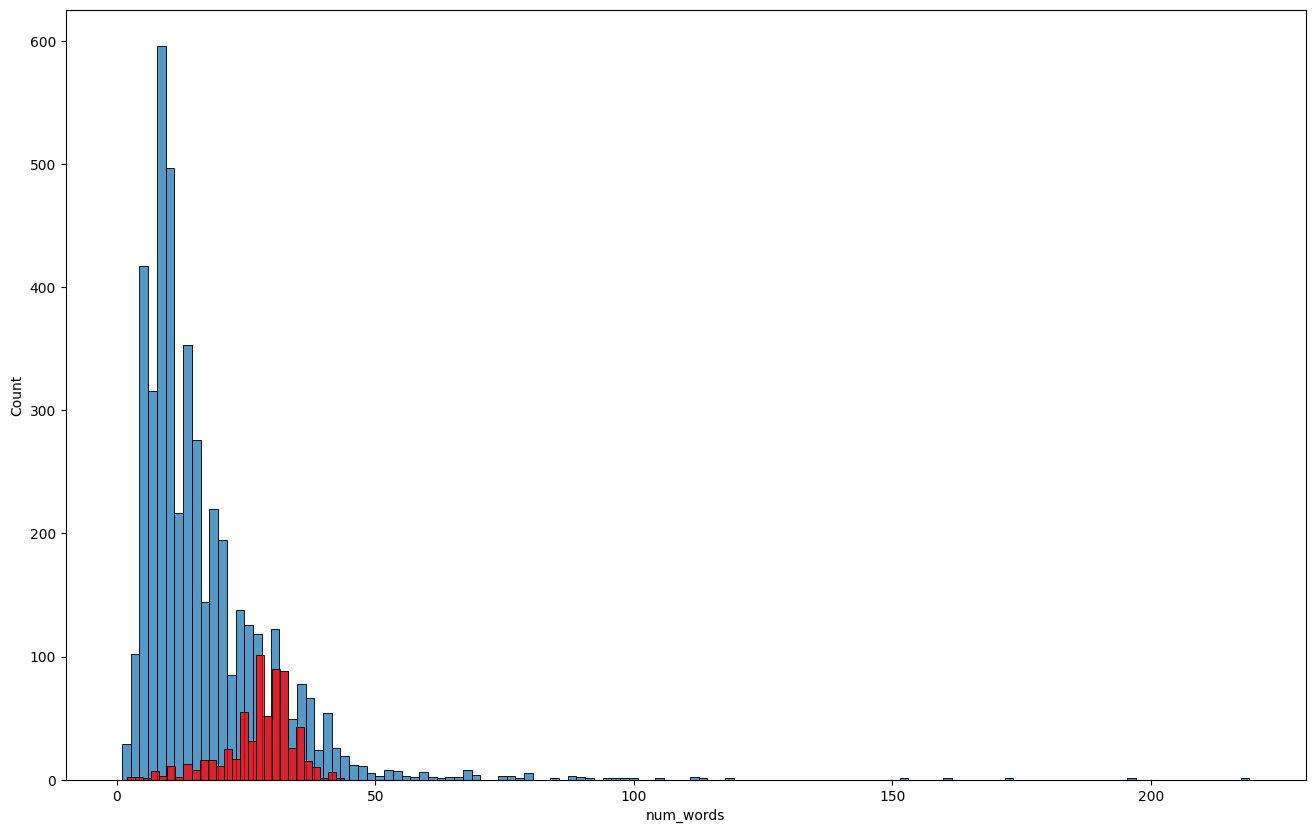

In [36]:
# Create a figure with a specified size (16x10 inches) to display the histograms
plt.figure(figsize=(16,10))

# Plot a histogram of the 'num_words' column for entries where 'target' is 0 (assuming 0 represents one class)
sns.histplot(df[df['target']==0]['num_words'])

# Plot a histogram of the 'num_words' column for entries where 'target' is 1 (assuming 1 represents another class),
# with a different color (red) to distinguish it from the first class
sns.histplot(df[df['target']==1]['num_words'], color='red')

In [37]:
plt.figure(figsize=(100,90))
sns.histplot(df[df['target']==0]['num_of_sentences'])
sns.histplot(df[df['target']==1]['num_of_sentences'], color='red')

<Axes: xlabel='num_of_sentences', ylabel='Count'>

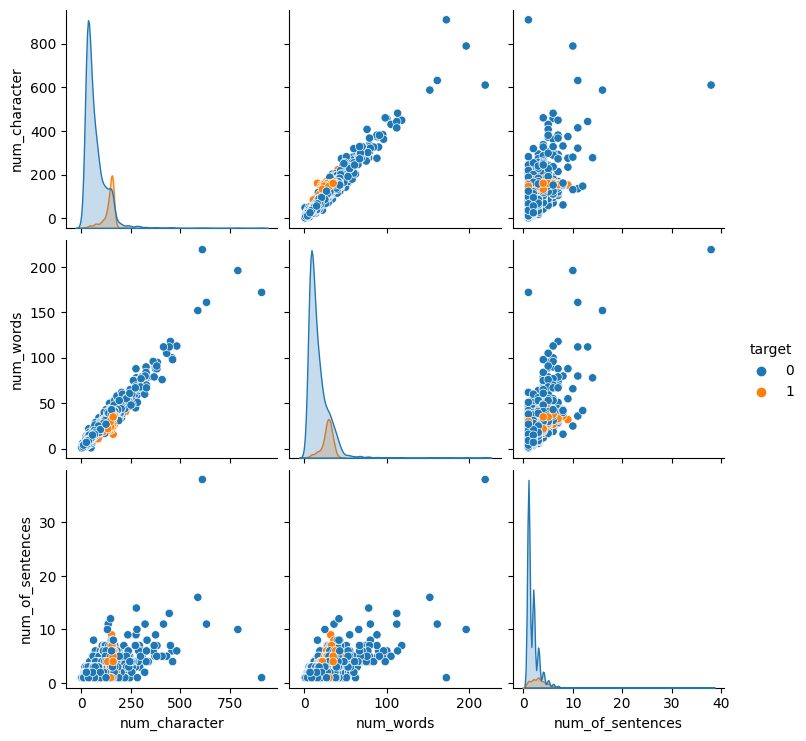

In [38]:
# Create a pairplot to visualize pairwise relationships between variables in the DataFrame 'df'
# with the data points colored by the 'target' column to distinguish between different classes
sns.pairplot(df,hue='target')

# 3. Data Preprocessing
Lower Case
1) Tokenization
2) Removing Special Characters
3) Removing stop words and pucntuation
4) Stemming


In [39]:
# Import the PorterStemmer class from the nltk.stem.porter module
from nltk.stem.porter import PorterStemmer

# Create an instance of the PorterStemmer class
ps = PorterStemmer()

In [40]:
# Import the stopwords corpus from the nltk.corpus module
# Stopwords are common words (e.g., 'the', 'is', 'and') that are often removed from text during preprocessing
from nltk.corpus import stopwords

# Import the string module
# The string module provides a collection of string constants and functions for string manipulation
import string

In [41]:
def text_transform(text):
    """
    Preprocesses the input text by performing the following steps:
    1. Converts the text to lowercase.
    2. Tokenizes the text into words.
    3. Removes non-alphanumeric characters.
    4. Removes stopwords and punctuation.
    5. Stems each word using the PorterStemmer.
    
    Parameters:
        text (str): The input text to be transformed.
        
    Returns:
        str: The preprocessed text.
    """
    # Convert the text to lowercase
    text = text.lower()
    
    # Tokenize the text into words
    text = nltk.word_tokenize(text)
    
    # Initialize an empty list to store the filtered words
    y=[]
    
    # Iterate over each word in the tokenized text
    for i in text:
        # Check if the word contains only alphanumeric characters
        if i.isalnum():
            # Append the word to the list if it contains only alphanumeric characters
            y.append(i)
    
    # Update the text to contain only the filtered words
    text = y[:]
    
    # Clear the list 'y' for re-use
    y.clear()
    
    # Iterate over each word in the filtered text
    for i in text:
        # Check if the word is not a stopword and not a punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            # Append the word to the list if it meets the condition
            y.append(i)
     
    # Update the text to contain only the filtered words
    text = y[:]
    
    # Clear the list 'y' for re-use
    y.clear()
    
    # Iterate over each word in the filtered text
    for i in text:
        # Stem each word using the PorterStemmer and append it to the list
        y.append(ps.stem(i))
    
     # Join the stemmed words into a single string separated by whitespace
    return " ".join(y)

In [42]:
# Apply the text_transform function to preprocess the 'text' column of the DataFrame
# and create a new column 'transformed_text' to store the preprocessed text
df['transformed_text'] = df['text'].apply(text_transform)

In [43]:
# top 5 rows from DataFrame
df.head()

,target,text,num_character,num_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
# Import the WordCloud class from the wordcloud module
from wordcloud import WordCloud

# Create an instance of the WordCloud class with specified parameters
# width=500: Width of the word cloud image
# height=500: Height of the word cloud image
# min_font_size=10: Minimum font size of words in the word cloud
# background_color='white': Background color of the word cloud image
wc = WordCloud(width=500, height=500, min_font_size=10,background_color='white')

In [45]:
# Generate a word cloud for the 'transformed_text' of entries where 'target' is 1 (assuming 1 represents 'spam')
# by concatenating all the preprocessed text into a single string and passing it to the WordCloud instance
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

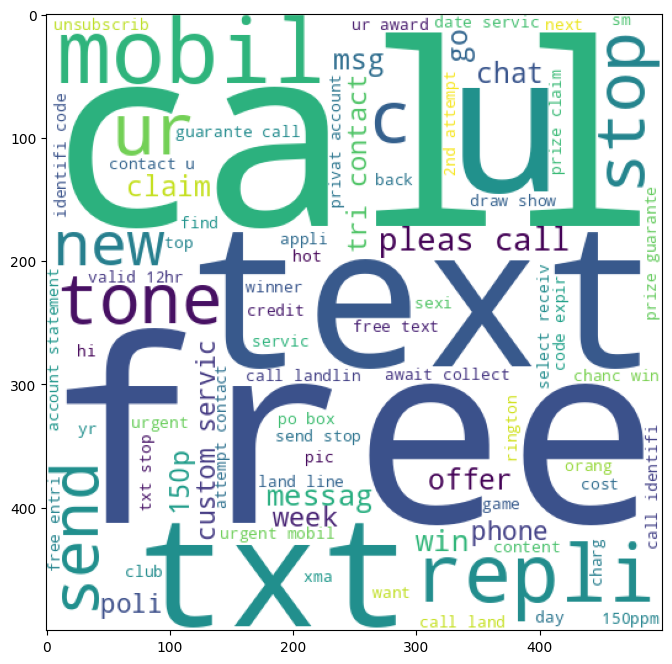

In [46]:
# Create a figure with a specified size (15x8 inches) to display the word cloud
plt.figure(figsize=(15,8))

# Display the generated word cloud for spam-related text using the imshow() function
plt.imshow(spam_wc)

In [47]:
# Generate a word cloud for the 'transformed_text' of entries where 'target' is 0 (assuming 0 represents 'ham')
# by concatenating all the preprocessed text into a single string and passing it to the WordCloud instance
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

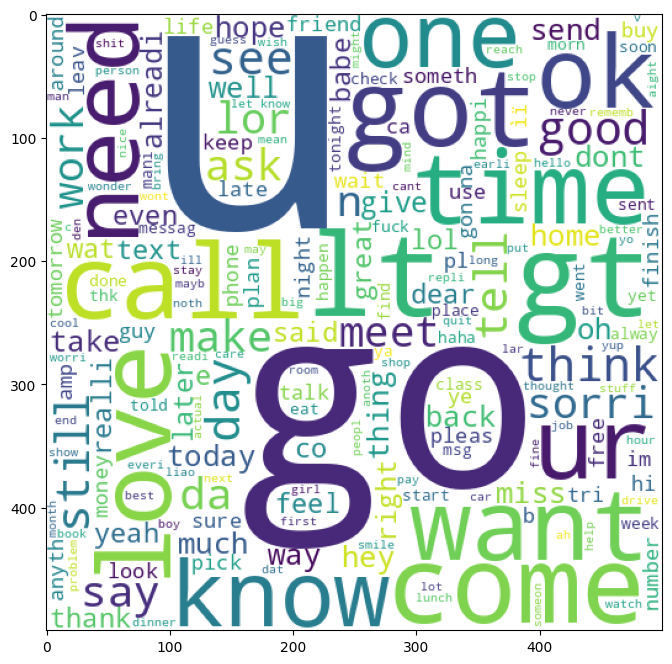

In [48]:
# Create a figure with a specified size (15x8 inches) to display the word cloud
plt.figure(figsize=(15,8))

# Display the generated word cloud for ham-related text using the imshow() function
plt.imshow(ham_wc)

In [49]:
# Create a list to store the individual words from the preprocessed text of spam-related entries
spam_corpus =[]

# Iterate over each message in the preprocessed text of entries where 'target' is 1 (assuming 1 represents 'spam')
for msg in df[df['target']==1]['transformed_text'].tolist():
    # Split each message into words and iterate over them
    for word in msg.split():
        # Append each word to the spam_corpus list
        spam_corpus.append(word)

In [50]:
# Create a list to store the individual words from the preprocessed text of ham-related entries
ham_corpus =[]

# Iterate over each message in the preprocessed text of entries where 'target' is 0 (assuming 0 represents 'ham')
for msg in df[df['target']==0]['transformed_text'].tolist():
    # Split each message into words and iterate over them
    for word in msg.split():
        # Append each word to the ham_corpus list
        ham_corpus.append(word)

In [51]:
# Calculate the total number of words in the spam corpus
len(spam_corpus)

9883

In [52]:
# Calculate the total number of words in the ham corpus
len(ham_corpus)

34771

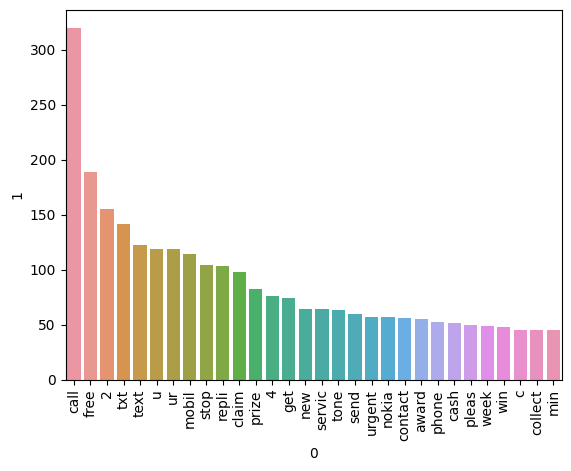

In [54]:
# Import the Counter class from the collections module
from collections import Counter

# Create a bar plot to visualize the frequency of the top 30 most common words in the spam corpus
# x-axis: The words (first column) from the DataFrame
# y-axis: The frequency counts (second column) from the DataFrame
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

# Rotate the x-axis labels vertically for better readability
plt.xticks(rotation='vertical')

# Display the bar plot
plt.show()

# 4. Model Building

In [56]:
# Import the CountVectorizer and TfidfVectorizer classes from the sklearn.feature_extraction.text module
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Create a CountVectorizer object
# CountVectorizer converts a collection of text documents into a matrix of token counts
cv = CountVectorizer()

# Create a TfidfVectorizer object with a maximum of 3000 features
# TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features
# TF-IDF (Term Frequency-Inverse Document Frequency) reflects the importance of a word in a document relative to a collection of documents
# It assigns higher weights to words that appear frequently in a document but rarely in other documents
tfidf = TfidfVectorizer(max_features=3000)

In [58]:
# Extract the preprocessed text from the 'transformed_text' column of the DataFrame 'df'
# Convert the text values to string type and store them as a NumPy array
corpus = df['transformed_text'].astype(str).values

# Fit and transform the text data
X = tfidf.fit_transform(corpus).toarray()
#X=tfidf.fit_transform(df['transformed_text']).toarray()

In [59]:
# Extract the target labels from the 'target' column of the DataFrame 'df'
# and store them as a NumPy array
y = df['target'].values

In [60]:
# display 'y'
y

array([0, 0, 1, ..., 0, 0, 0])

In [61]:
# Import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

In [62]:
# Split the features (X) and target labels (y) into training and testing sets
# with 80% of the data used for training and 20% for testing
# random_state=2 ensures reproducibility of the same random split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [63]:
# Import the Gaussian Naive Bayes, Multinomial Naive Bayes, and Bernoulli Naive Bayes classifiers
# from the sklearn.naive_bayes module
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Import accuracy_score, confusion_matrix, and precision_score functions
# from the sklearn.metrics module
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [64]:
# Create instances of Gaussian Naive Bayes, Multinomial Naive Bayes, and Bernoulli Naive Bayes classifiers
gnb = GaussianNB()  # Gaussian Naive Bayes classifier
mnb = MultinomialNB()  # Multinomial Naive Bayes classifier
bnb = BernoulliNB()  # Bernoulli Naive Bayes classifier

In [65]:
# Train the Gaussian Naive Bayes classifier using the training data
gnb.fit(X_train,y_train)

# Predict the target labels for the test data 
y_pred1 = gnb.predict(X_test)

# Calculate and print the accuracy score
print(accuracy_score(y_test,y_pred1))

# Print the confusion matrix
print(confusion_matrix(y_test,y_pred1))

# Calculate and print the precision score
print(precision_score(y_test,y_pred1))

0.867504835589942
[[785 111]
 [ 26 112]]
0.5022421524663677


In [66]:
# Train the Multinomial Naive Bayes classifier using the test data
mnb.fit(X_train,y_train)

# Predict the target labels for the test data 
y_pred2 = mnb.predict(X_test)

# Calculate and print the accuracy score
print(accuracy_score(y_test,y_pred2))

# Print the confusion matrix
print(confusion_matrix(y_test,y_pred2))

# Calculate and print the precision score
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [67]:
# Train the Bernoulli Naive Bayes classifier using the test data
bnb.fit(X_train,y_train)

# Predict the target labels for the test data 
y_pred3 = bnb.predict(X_test)

# Calculate and print the accuracy score
print(accuracy_score(y_test,y_pred3))

# Print the confusion matrix
print(confusion_matrix(y_test,y_pred3))

# Calculate and print the precision score
print(precision_score(y_test,y_pred3))

0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


In [68]:
# Import various classifiers from the respective modules
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC  # Support Vector Classifier (SVM)
from sklearn.naive_bayes import MultinomialNB # Multinomial Naive Bayes
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.ensemble import AdaBoostClassifier # AdaBoost Classifier
from sklearn.ensemble import BaggingClassifier  # Bagging Classifier
from sklearn.ensemble import ExtraTreesClassifier  # Extra Trees Classifier
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting Classifier
from xgboost import XGBClassifier  # XGBoost Classifier


In [69]:
# Initialize various classifiers with specific hyperparameters
svc = SVC(kernel='sigmoid', gamma=1.0)  # Support Vector Classifier with 'sigmoid' kernel and gamma=1.0
knc = KNeighborsClassifier()  # K-Nearest Neighbors Classifier
mnb = MultinomialNB()  # Multinomial Naive Bayes Classifier
dtc = DecisionTreeClassifier(max_depth=5)  # Decision Tree Classifier with max depth of 5
lrc = LogisticRegression(solver='liblinear', penalty='l1')  # Logistic Regression Classifier with L1 penalty
rfc = RandomForestClassifier(n_estimators=50, random_state=2)  # Random Forest Classifier with 50 estimators
abc = AdaBoostClassifier(n_estimators=50, random_state=2)  # AdaBoost Classifier with 50 estimators
bc = BaggingClassifier(n_estimators=50, random_state=2)  # Bagging Classifier with 50 estimators
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)  # Extra Trees Classifier with 50 estimators
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)  # Gradient Boosting Classifier with 50 estimators
xgb = XGBClassifier(n_estimators=50,random_state=2)  # XGBoost Classifier with 50 estimators

In [70]:
# Create a dictionary containing initialized classifiers with corresponding keys
clfs = {
    'SVC' : svc,      # Support Vector Classifier
    'KN' : knc,       # K-Nearest Neighbors Classifier
    'NB': mnb,        # Multinomial Naive Bayes Classifier
    'DT': dtc,        # Decision Tree Classifier
    'LR': lrc,        # Logistic Regression Classifier
    'RF': rfc,        # Random Forest Classifier
    'AdaBoost': abc,  # Ada BoostClassifier
    'BgC': bc,        # Bagging Classifier
    'ETC': etc,       # Extra Trees Classifier
    'GBDT':gbdt,      # Gradient Boosting Classifier
    'xgb':xgb         # XGBoost Classifier
}

In [71]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    """
    Trains a classifier on the training data and evaluates its performance on the test data.

    Parameters:
        clf: Initialized classifier object.
        X_train: Features of the training data.
        y_train: Target labels of the training data.
        X_test: Features of the test data.
        y_test: Target labels of the test data.
    
    Returns:
        accuracy: Accuracy score of the classifier on the test data.
        precision: Precision score of the classifier on the test data.
    """
    
    # Train the classifier on the training data
    clf.fit(X_train,y_train)
    
    # Predict the target labels for the test data
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy score of the classifier on the test data
    accuracy = accuracy_score(y_test,y_pred)
    
    # Calculate the precision score of the classifier on the test data
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [72]:
# on the training data (X_train and y_train) and evaluate its performance on the test data (X_test and y_test)
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9666666666666667)

In [73]:
# Create empty lists to store accuracy scores and precision scores for each classifier
accuracy_scores = []
precision_scores = []

# Iterate over each classifier in the dictionary 'clfs'
for name,clf in clfs.items():
    
    # Train the current classifier and obtain accuracy and precision scores
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    # Print the classifier name
    print("For ",name)
    
    # Print the accuracy score of the current classifier
    print("Accuracy - ",current_accuracy)
    
    # Print the precision score of the current classifier
    print("Precision - ",current_precision)
    
    # Append the accuracy score of the current classifier to the accuracy_scores list
    accuracy_scores.append(current_accuracy)
    
    # Append the precision score of the current classifier to the precision_scores list
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  1.0
For  DT
Accuracy -  0.9313346228239845
Precision -  0.8316831683168316
For  LR
Accuracy -  0.9574468085106383
Precision -  0.9519230769230769
For  RF
Accuracy -  0.971953578336557
Precision -  0.9739130434782609
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For  BgC
Accuracy -  0.9545454545454546
Precision -  0.8527131782945736
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For  GBDT
Accuracy -  0.9487427466150871
Precision -  0.9292929292929293
For  xgb
Accuracy -  0.9642166344294004
Precision -  0.9243697478991597


In [74]:
# Create a DataFrame to store performance metrics (accuracy and precision) for each classifier
# 'Algorithm': Names of the classifiers
# 'Accuracy': Corresponding accuracy scores
# 'Precision': Corresponding precision scores
# Sort the DataFrame by 'Precision' column in descending order
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [75]:
# Display the DataFrame containing performance metrics (accuracy and precision) for each classifier
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.972921,1.000000
8,ETC,0.977756,0.983193
5,RF,0.971954,0.973913
0,SVC,0.974855,0.966667
4,LR,0.957447,0.951923
6,AdaBoost,0.964217,0.931624
9,GBDT,0.948743,0.929293
10,xgb,0.964217,0.924370
7,BgC,0.954545,0.852713


In [76]:
# Reshape the DataFrame 'performance_df' from wide to long format using pd.melt()
# The column 'Algorithm' is kept as an identifier variable (id_vars)
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [77]:
# Display the contents
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.972921
2,ETC,Accuracy,0.977756
3,RF,Accuracy,0.971954
4,SVC,Accuracy,0.974855
5,LR,Accuracy,0.957447
6,AdaBoost,Accuracy,0.964217
7,GBDT,Accuracy,0.948743
8,xgb,Accuracy,0.964217
9,BgC,Accuracy,0.954545


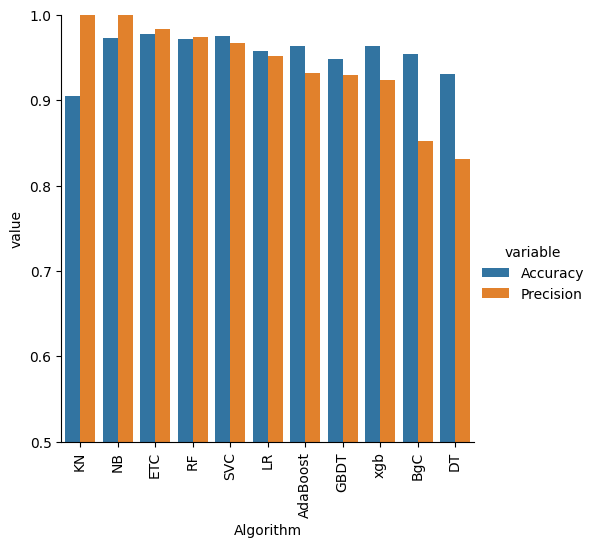

In [78]:
# Create a categorical plot (catplot) using seaborn to visualize the performance metrics (accuracy and precision)
# 'x': Algorithm names
# 'y': Metric values (either accuracy or precision)
# 'hue': Variable (accuracy or precision)
# 'data': DataFrame containing the reshaped performance metrics (performance_df1)
# 'kind': Type of plot ('bar' for bar plot)
# 'height': Height of the plot
sns.catplot(x = 'Algorithm', y='value',hue = 'variable',data=performance_df1, kind='bar',height=5)

# Set the y-axis limit to focus on the range between 0.5 and 1.0
plt.ylim(0.5,1.0)

# Rotate the x-axis labels vertically for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

In [79]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [80]:
# Create a Voting Classifier with soft voting strategy
# The ensemble consists of Support Vector Classifier (svc), Multinomial Naive Bayes (mnb), and Extra Trees Classifier (etc)
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [81]:
# Train the Voting Classifier on the training data
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [82]:
# Predict the target labels for the test data using the trained Voting Classifier
y_pred = voting.predict(X_test)

# Calculate and print the accuracy score of the Voting Classifier on the test data
print("Accuracy",accuracy_score(y_test,y_pred))

# Calculate and print the precision score of the Voting Classifier on the test data
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.975609756097561


In [83]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [85]:
# Import the Stacking Classifier from the sklearn.ensemble module
from sklearn.ensemble import StackingClassifier

In [86]:
# Create a Stacking Classifier with specified base estimators and final estimator
# 'estimators': List of (name, estimator) tuples specifying the base estimators
# 'final_estimator': Meta-estimator used to aggregate predictions from base estimators
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [87]:
# Train the Stacking Classifier on the training data
clf.fit(X_train,y_train)

# Predict the target labels for the test data using the trained Stacking Classifier
y_pred = clf.predict(X_test)

# Calculate and print the accuracy score of the Stacking Classifier on the test data
print("Accuracy",accuracy_score(y_test,y_pred))

# Calculate and print the precision score of the Stacking Classifier on the test data
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [89]:
# Save the TfidfVectorizer object (tfidf) as 'vectorizer.pkl' using pickle
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

# Save the Multinomial Naive Bayes model (mnb) as 'model.pkl' using pickle
pickle.dump(mnb,open('model.pkl','wb'))